In [13]:
# Load libraries
from pandas import read_csv, DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [8]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names=names)

In [48]:
# Load alternative dataset
import psycopg2
from psycopg2.extras import RealDictCursor

mov = psycopg2.connect(dbname='mov_db', user='app', host='192.168.3.44', port='5432', password='postgres')

measures = "select /*a_id as aid,*/ level, u, l_l, a_p, dist2zero \
            from measure.torso_detail \
            where dist2zero <> -1"

def getData(connection, query):
    cur = connection.cursor(cursor_factory = RealDictCursor)
    cur.execute(query)
    data = cur.fetchall()
    connection.commit()
    cur.close()
    del cur
    return data


In [49]:
dataset = DataFrame(getData(mov, measures))

In [50]:
# shape
print(dataset.shape)

(907, 5)


In [51]:
# head
#print(dataset.head(20))
dataset

,level,u,l_l,a_p,dist2zero
0,2-C7,NaN,NaN,NaN,275.0
1,2-C7,NaN,NaN,NaN,220.0
2,2-C7,NaN,NaN,NaN,360.0
3,2-C7,NaN,NaN,NaN,440.0
4,2-C7,NaN,NaN,NaN,325.0
...,...,...,...,...,...
902,8-Trochanter,770.0,295.0,175.0,230.0
903,8-Trochanter,640.0,210.0,150.0,140.0
904,8-Trochanter,800.0,285.0,185.0,170.0
905,8-Trochanter,890.0,320.0,200.0,180.0


In [52]:
# descriptions
print(dataset.describe())

                 u         l_l         a_p   dist2zero
count   623.000000  623.000000  311.000000  907.000000
mean    684.765650  241.487961  162.141479  196.016538
std     182.615782   47.621560   40.548966   96.872830
min      -1.000000  110.000000   -1.000000   21.000000
25%     605.000000  205.000000  135.000000  115.000000
50%     700.000000  240.000000  160.000000  190.000000
75%     800.000000  270.000000  190.000000  265.000000
max    1130.000000  390.000000  310.000000  540.000000


In [53]:
# class distribution
#print(dataset.groupby('class').size())
print(dataset.groupby('level').size())

level
2-C7             148
3-Caput.Clavi    136
4-Achsel         155
5-Unterbrust     156
7-Spina          156
8-Trochanter     156
dtype: int64


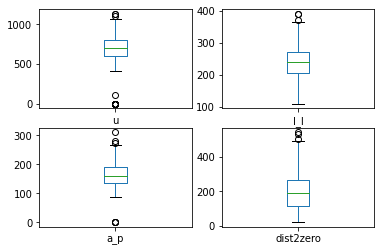

In [55]:
# visualisation

# box and whisker plots --> This gives us a much clearer idea of the distribution of the input attributes:
#dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

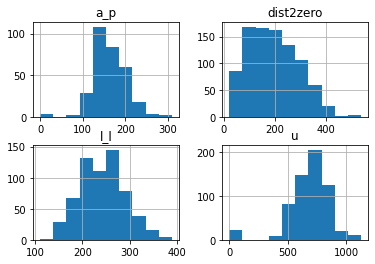

In [56]:
# histograms --> We can also create a histogram of each input variable to get an idea of the distribution.
dataset.hist()
pyplot.show()

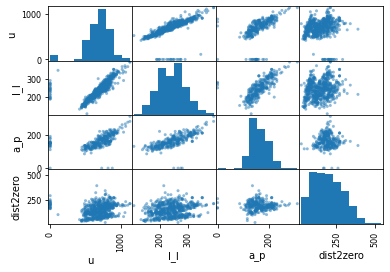

In [57]:
# scatter plot matrix --> Now we can look at the interactions between the variables.
scatter_matrix(dataset)
pyplot.show()

In [60]:
# Evaluate some algorythms:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [61]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# In this case, we can see that it looks like Support Vector Machines (SVM) has the largest estimated accuracy score at about 0.98 or 98%.

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'unknown' instead.

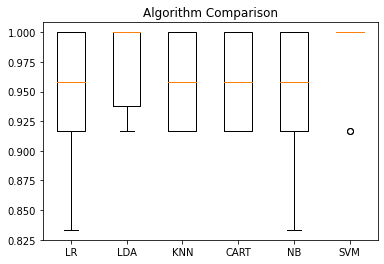

In [27]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [28]:
# Make Predictions
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [29]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

